# **Udemy Courses Data Analysis:**

**Source:** __https://www.kaggle.com/datasets/andrewmvd/udemy-courses__

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as slr

In [2]:
data= pd.read_csv("C:/Users/MyMachine/Desktop/Mission-Project/00_DataSets/10_udemy_courses.csv", parse_dates= ["published_timestamp"])

In [3]:
data.shape

(3678, 12)

In [4]:
data.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [5]:
# top 3 rows of the dataset: 
data.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance


In [6]:
#last 3 rows of data:
data.tail(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28 19:51:11+00:00,Web Development


In [7]:
# 2 random data points
data.sample(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2564,641868,The Docker for DevOps course: From development...,https://www.udemy.com/the-docker-for-devops-co...,True,25,8234,1111,110,All Levels,7.5,2015-11-13 17:30:34+00:00,Web Development
1657,757900,Canva : Book Cover Design,https://www.udemy.com/canva-book-cover-design/,True,100,3377,20,15,Beginner Level,2.0,2016-02-26 01:08:20+00:00,Graphic Design


---

In [8]:
# Find the shape of our dataset (Number of rows and number of columns):
print(F"Shape of Dataset is: {data.shape}")

print(F"Total Number of Rows:{data.shape[0]}")

print(F"Total Number of Columns:{data.shape[1]}")

Shape of Dataset is: (3678, 12)
Total Number of Rows:3678
Total Number of Columns:12


----

In [9]:
# Getting information about our dataset like
# the number of rows and columns, datatype of each
# column and memory requirements:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

----

In [10]:
# Check for null values in the dataset: 
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

So, no Null values were detected.

----

In [11]:
# Check for duplicate data
data.duplicated().value_counts()

False    3672
True        6
Name: count, dtype: int64

So, 6 duplicates were detected.

In [12]:
# Drop the duplicates:
data.drop_duplicates(inplace= True)

In [13]:
data.duplicated().value_counts()

False    3672
Name: count, dtype: int64

----------------------------------------------------------------

In [15]:
# Find out the number of cources per subject:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [17]:
data["subject"].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

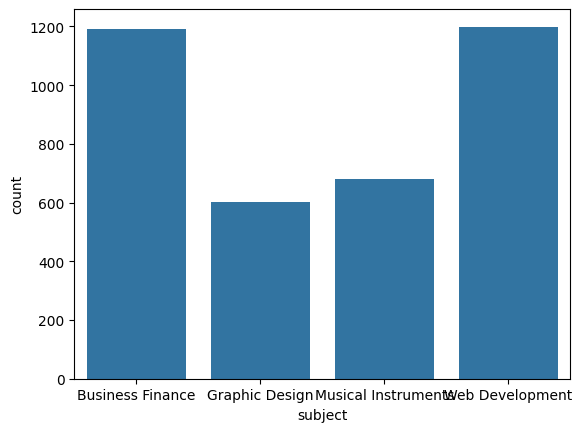

In [23]:
sns.countplot(x= data["subject"], data=data)

----

In [24]:
# Foe which levels, udemy cources providing the cources:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [26]:
data['level'].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

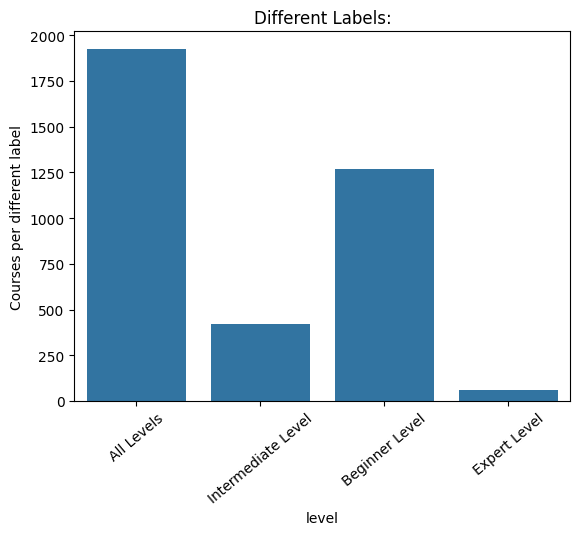

In [33]:
sns.countplot(x= data['level'])
plt.title("Different Labels:")
plt.xticks(rotation= 40)
plt.ylabel("Courses per different label")
plt.show()

---------

In [34]:
# Display the count of paid and free courses:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [43]:
data["is_paid"]

0       True
1       True
2       True
3       True
4       True
        ... 
3673    True
3674    True
3675    True
3676    True
3677    True
Name: is_paid, Length: 3672, dtype: bool

In [44]:
data["is_paid"].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

<Axes: xlabel='is_paid', ylabel='count'>

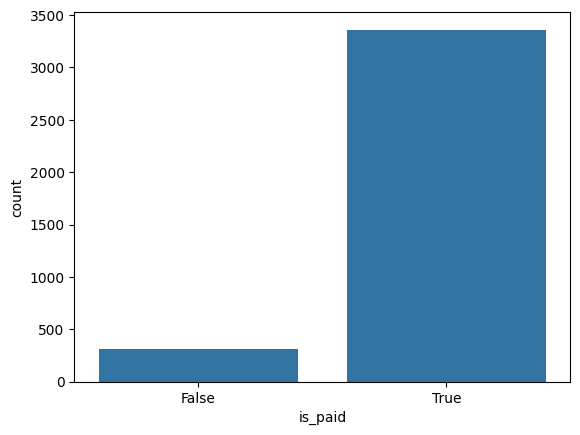

In [47]:
sns.countplot(x= data["is_paid"], data= data)

In [46]:
data[data["is_paid"]].shape

(3362, 12)

-----

In [48]:
# Which course has more lectures (free or paid?):
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [54]:
data.groupby(["is_paid"])["num_lectures"].mean()

is_paid
False    21.416129
True     41.866746
Name: num_lectures, dtype: float64

-----

In [55]:
# which coursess have a higher number of subscriptions: free or paid?
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

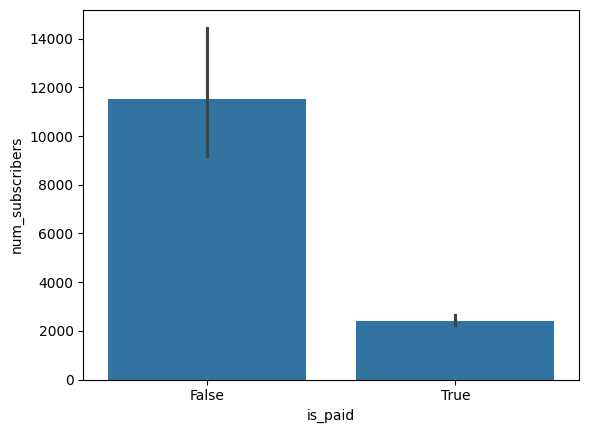

In [60]:
sns.barplot(x= "is_paid", y= "num_subscribers", data= data)

In [57]:
data.groupby(["is_paid"])["num_subscribers"].mean()

is_paid
False    11533.951613
True      2421.270077
Name: num_subscribers, dtype: float64

---

In [61]:
# Which level has the higher number of subscribers:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [63]:
data["level"].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [68]:
data.groupby(["level"])["num_subscribers"].mean()

level
All Levels            3569.761558
Beginner Level        3195.459779
Expert Level           865.448276
Intermediate Level    1762.482185
Name: num_subscribers, dtype: float64

In [69]:
data.groupby(["level"])["num_subscribers"].max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, 'All Levels'),
  Text(1, 0, 'Intermediate Level'),
  Text(2, 0, 'Beginner Level'),
  Text(3, 0, 'Expert Level')])

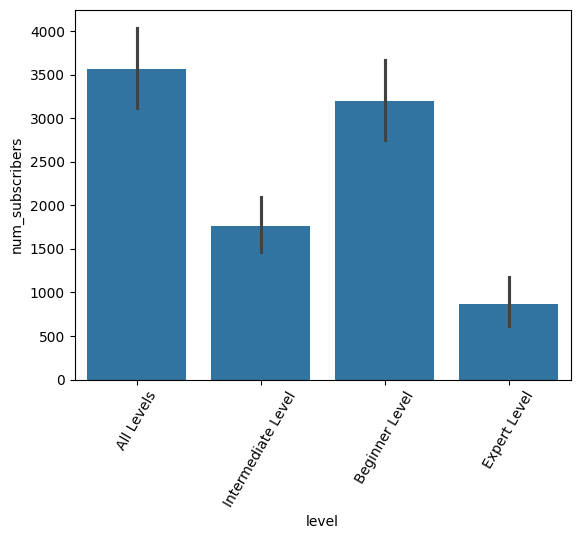

In [71]:
sns.barplot(data=data, x= "level", y= "num_subscribers")
plt.xticks(rotation=60)

------

In [72]:
# what is the mostt popular course title:
## The popularity is on the basis of the number of suscribers
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [101]:
data["num_subscribers"].sort_values(ascending= False)

2827    268923
3032    161029
3230    121584
2783    120291
3232    114512
         ...  
2398         0
2397         0
1239         0
1241         0
2418         0
Name: num_subscribers, Length: 3672, dtype: int64

In [97]:
data["num_subscribers"].max()== data["num_subscribers"]

0       False
1       False
2       False
3       False
4       False
        ...  
3673    False
3674    False
3675    False
3676    False
3677    False
Name: num_subscribers, Length: 3672, dtype: bool

In [98]:
data[data["num_subscribers"].max()== data["num_subscribers"]]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development


In [102]:
data[data["num_subscribers"].max()== data["num_subscribers"]]["course_title"]

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

----

In [103]:
# Display 10 most popular courses as per the number of subscribers:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [109]:
data.sort_values(by= "num_subscribers", ascending= False).head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15 17:00:33+00:00,Musical Instruments
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13 18:29:47+00:00,Web Development
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10 15:19:29+00:00,Web Development
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19 03:02:05+00:00,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development


In [112]:
data1= data.sort_values(by= "num_subscribers", ascending= False).head(10)

In [110]:
data.sort_values(by= "num_subscribers", ascending= False).head(10)["course_title"]

2827                 Learn HTML5 Programming From Scratch
3032                       Coding for Entrepreneurs Basic
3230                           The Web Developer Bootcamp
2783    Build Your First Website in 1 Week with HTML5 ...
3232                The Complete Web Developer Course 2.0
1896                Free Beginner Electric Guitar Lessons
2589    Web Design for Web Developers: Build Beautiful...
2619               Learn Javascript & JQuery From Scratch
3289    Practical PHP: Master the Basics and Code Dyna...
3247            JavaScript: Understanding the Weird Parts
Name: course_title, dtype: object

<Axes: xlabel='num_subscribers', ylabel='course_title'>

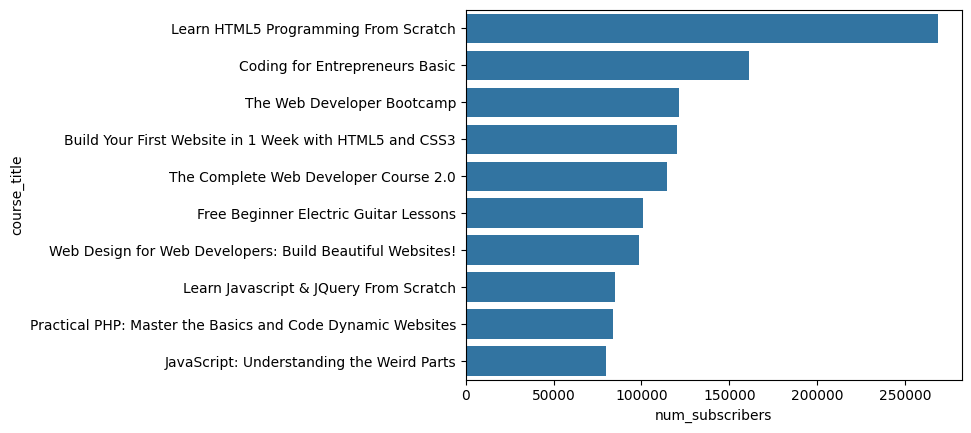

In [113]:
sns.barplot(data= data1, x= "num_subscribers", y= "course_title")

------

In [114]:
# Find the course_title which having the higest number of reviews:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [119]:
data["num_reviews"].max()

np.int64(27445)

In [120]:
data["num_reviews"] ==data["num_reviews"].max()

0       False
1       False
2       False
3       False
4       False
        ...  
3673    False
3674    False
3675    False
3676    False
3677    False
Name: num_reviews, Length: 3672, dtype: bool

In [121]:
data[data["num_reviews"] ==data["num_reviews"].max()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development


----

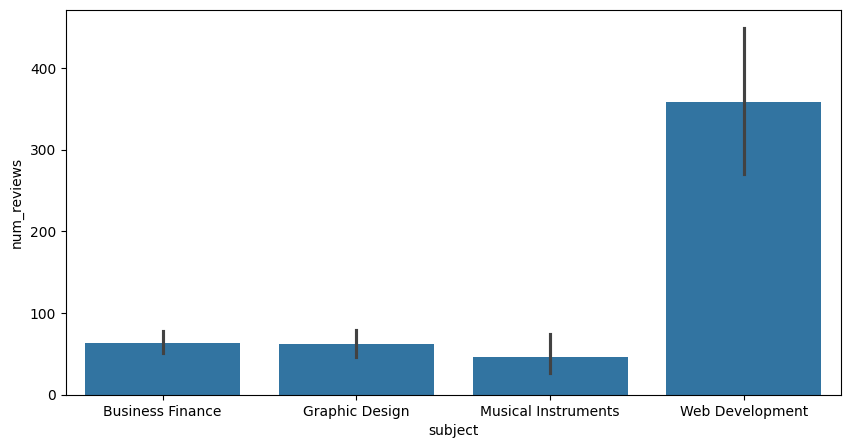

In [124]:
# Find the subject which having the higest number of reviews:
plt.figure(figsize= (10,5))
sns.barplot(data= data, x= "subject", y= "num_reviews")
plt.show()

-----

In [ ]:
# Does price affects the number of reviews:

<Axes: xlabel='price', ylabel='num_reviews'>

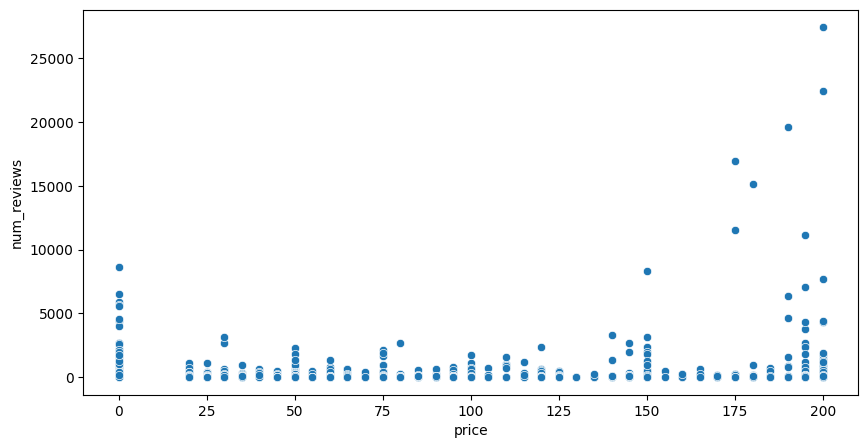

In [126]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x= "price", y= "num_reviews", data= data)

----

In [127]:
# Find total number of courses related to python:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [129]:
data["subject"].value_counts()
# there is no any word that is Python in "Subject"

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

In [132]:
data["course_title"].str.contains("Python", case= False).value_counts()

course_title
False    3643
True       29
Name: count, dtype: int64

In [133]:
data["course_title"].str.contains("Python", case= False)

0       False
1       False
2       False
3       False
4       False
        ...  
3673    False
3674    False
3675    False
3676    False
3677    False
Name: course_title, Length: 3672, dtype: bool

In [134]:
data[data["course_title"].str.contains("Python", case= False)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7.0,2017-04-28 16:41:44+00:00,Business Finance
30,1170894,Python Algo Stock Trading: Automate Your Trading!,https://www.udemy.com/algorithmic-stock-tradin...,True,95,1165,21,41,Beginner Level,2.5,2017-05-28 23:41:03+00:00,Business Finance
41,1035472,Python for Finance: Investment Fundamentals & ...,https://www.udemy.com/python-for-finance-inves...,True,195,3811,278,103,All Levels,6.5,2017-03-30 22:17:09+00:00,Business Finance
147,1070886,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,True,200,453,42,33,Intermediate Level,3.0,2017-03-14 00:39:45+00:00,Business Finance
334,815482,Stock Technical Analysis with Python,https://www.udemy.com/stock-technical-analysis...,True,50,409,35,46,All Levels,8.0,2016-04-12 00:40:03+00:00,Business Finance
536,529828,Python for Trading & Investing,https://www.udemy.com/python-for-trading-inves...,True,95,638,25,36,All Levels,5.0,2015-06-17 22:23:31+00:00,Business Finance
762,1088656,Quantitative Trading Analysis with Python,https://www.udemy.com/quantitative-trading-ana...,True,50,256,17,49,All Levels,5.5,2017-01-27 17:11:28+00:00,Business Finance
863,902888,Investment Portfolio Analysis with Python,https://www.udemy.com/investment-portfolio-ana...,True,50,209,13,37,All Levels,7.0,2016-07-13 21:40:32+00:00,Business Finance
1682,546848,Learn to code in Python and learn Adobe Photos...,https://www.udemy.com/learn-to-code-in-python-...,True,50,1132,1,29,All Levels,2.0,2015-07-08 00:15:12+00:00,Graphic Design
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development


In [137]:
data[data["course_title"].str.contains("Python", case= False)]["course_id"].nunique()

29

-----

In [138]:
# Display 10 most popular Python courses as 
# per the number of subscribers:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [141]:
pth= data[data["course_title"].str.contains("Python", case= False)]

In [151]:
pth.shape

(29, 12)

In [146]:
pth.sort_values(by= "num_subscribers", ascending=False)["course_title"].head(10)

2497                          Web Programming with Python
2570    Coding for Entrepreneurs: Learn Python, Django...
2528          Learn Python and Django: Payment Processing
3200    Python and Django Full Stack Web Developer Boo...
3507    Fun and creative web engineering with Python a...
2553    The Complete Ethical Hacking Course 2.0: Pytho...
3138    Complete Python Web Course: Build 8 Python Web...
3197    Try Django 1.9 | Build a Blog and Learn Python...
2681    Python for Beginners: Python Programming Langu...
3203                      REST APIs with Flask and Python
Name: course_title, dtype: object

<Axes: xlabel='num_subscribers', ylabel='course_title'>

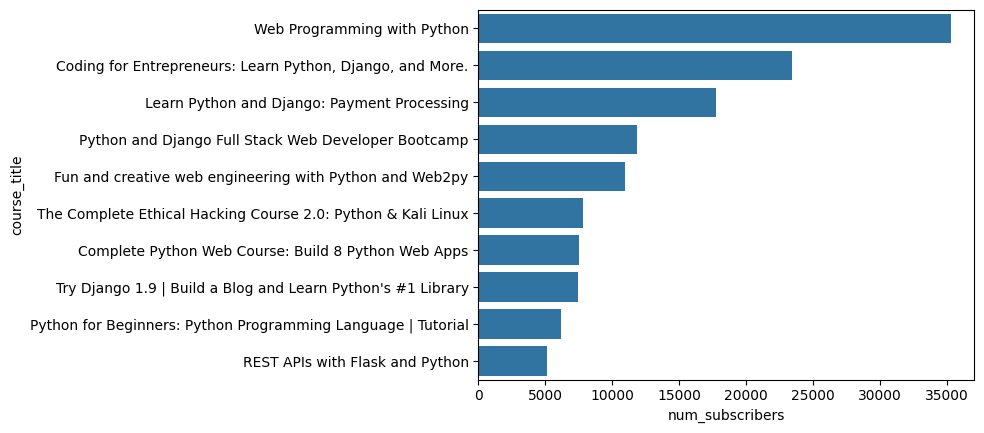

In [150]:
sns.barplot(x= "num_subscribers", y= "course_title", data=pth.sort_values(by= "num_subscribers", ascending=False).head(10) )

------

In [152]:
# In which year the
#  higest number of courses were posted?
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [155]:
data["year"]= data["published_timestamp"].dt.year

In [156]:
data.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017


<Axes: xlabel='year', ylabel='count'>

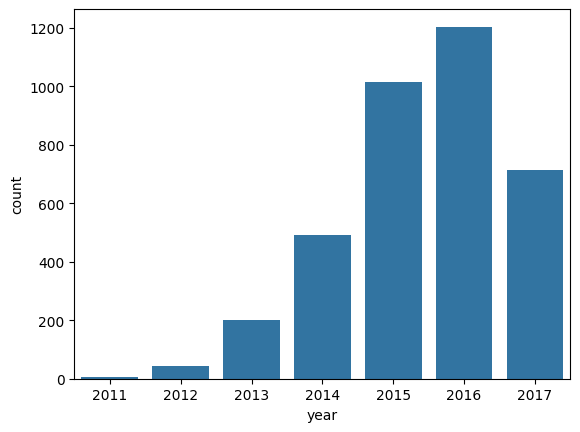

In [157]:
sns.countplot(data= data, x= "year")

So, most of the courses were posted in 2016 as seen in the graph.

---------

In [158]:
# Display category-wise count of posted
#  subjects (year wise):
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'year'],
      dtype='object')

In [161]:
data.groupby(by= "year")["subject"].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64